<a href="https://colab.research.google.com/github/LeDuyThanhUTE/BT/blob/main/Nhan_dien_tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#khai bao
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/BT/Money/

/content/drive/MyDrive/Colab Notebooks/BT/Money


In [3]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2 , zoom_range = 0.2, horizontal_flip = True) 

In [4]:
train = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT/Money/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 818 images belonging to 9 classes.


In [5]:
test = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BT/Money/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 270 images belonging to 9 classes.


In [6]:
train.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200k': 3,
 '20k': 4,
 '2k': 5,
 '500k': 6,
 '50k': 7,
 '5k': 8}

In [7]:
test.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200k': 3,
 '20k': 4,
 '2k': 5,
 '500k': 6,
 '50k': 7,
 '5k': 8}

In [ ]:

model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(9,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train,epochs=20,batch_size=128,verbose=1, validation_data=test, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/20
26/26 [==============================] - 387s 15s/step - loss: 6.9504 - accuracy: 0.1455 - val_loss: 2.3978 - val_accuracy: 0.1111
Epoch 2/20
26/26 [==============================] - 174s 7s/step - loss: 2.1933 - accuracy: 0.1650 - val_loss: 2.1001 - val_accuracy: 0.2370
Epoch 3/20
26/26 [==============================] - 166s 6s/step - loss: 2.0773 - accuracy: 0.2225 - val_loss: 2.0229 - val_accuracy: 0.3074
Epoch 4/20
26/26 [==============================] - 165s 6s/step - loss: 2.0052 - accuracy: 0.3264 - val_loss: 1.9193 - val_accuracy: 0.3333
Epoch 5/20
26/26 [==============================] - 165s 6s/step - loss: 1.8620 - accuracy: 0.4046 - val_loss: 2.2083 - val_accuracy: 0.2556
Epoch 6/20
26/26 [==============================] - 165s 6s/step - loss: 1.5437 - accuracy: 0.4621 - val_loss: 1.5840 - val_accuracy: 0.4889
Epoch 7/20
26/26 [==============================] - 167s 6s/step - loss: 1.7631 - accuracy: 0.4951 - val_loss: 1.4880 - val_accuracy: 0.5111
Epoch 8/20
2

In [ ]:
Score=model.evaluate(train,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.1646808385848999
Train Accuracy 0.9535452127456665


In [ ]:
model.save("Nhandientien.h5")

In [8]:
model_CNN=load_model('Nhandientien.h5')

1/1 [==============================] - 0s 58ms/step
[[3.9990619e-12 4.0607857e-11 1.5252053e-06 2.4566904e-18 2.1068405e-07
  5.3390555e-05 9.9821019e-01 4.2364311e-19 1.7345977e-03]]
500k


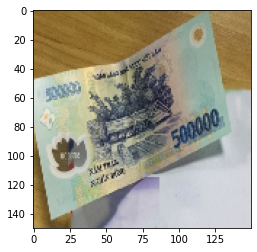

1/1 [==============================] - 0s 60ms/step
[[1.3202739e-17 7.5286075e-18 7.0731639e-06 7.4379279e-30 3.7320125e-13
  1.8901199e-13 2.8760978e-09 2.3234249e-35 9.9999297e-01]]
5k


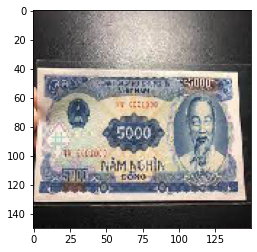

In [23]:
test="/content/drive/MyDrive/Colab Notebooks/BT/Money/attempt"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  print(result)
  if round(result[0][0])==1:
    prediction='100k'
  if round(result[0][1])==1:
    prediction='10k'
  if round(result[0][2])==1:
    prediction='1k'
  if round(result[0][3])==1:
    prediction='200k'
  if round(result[0][4])==1:
    prediction='20k'
  if round(result[0][5])==1:
    prediction='2k'
  if round(result[0][6])==1:
    prediction='500k'
  if round(result[0][7])==1:
    prediction='50k'
  if round(result[0][8])==1:
    prediction='5k'
  print(prediction)
  plt.show()